# Orange or Grape fruit Classification
Given data about citrus fruits, let's try to classify the type of a given fruit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#To load the dataset

df=pd.read_csv("citrus.csv")
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [3]:
#checking number of rows and collumns
df.shape

(10000, 6)

In [4]:
#to check null values 
df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [5]:
#checking type to confirm null values
df.dtypes

name         object
diameter    float64
weight      float64
red           int64
green         int64
blue          int64
dtype: object

In [6]:
#checking duplicate values
df.duplicated().sum()

0

In [7]:
df['name'].value_counts()

grapefruit    5000
orange        5000
Name: name, dtype: int64

<AxesSubplot:xlabel='name', ylabel='count'>

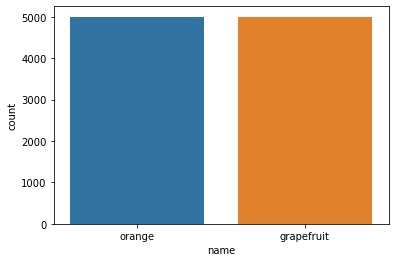

In [8]:
import seaborn as sns
sns.countplot(x = "name", data = df)

In [9]:
# Now Split DataSet into 2 parts
# Numeric type and Categorical type
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [10]:
df_num.head()

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9


In [11]:
df_cat.head()

,name
0,orange
1,orange
2,orange
3,orange
4,orange


In [12]:
# To convert categorical type data into numeric type.
# Use Label Encoder
from sklearn.preprocessing import LabelEncoder

In [13]:
for col in df_cat:
    # create an object of LabelEncoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [14]:
df_cat.dtypes

name    int32
dtype: object

In [15]:
# After applying LabelEncoder we concatenate df_cat and df_num.
df_new=pd.concat([df_num,df_cat],axis=1)


In [16]:
df_new.head()

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,1
1,3.91,88.05,166,78,3,1
2,4.42,95.17,156,81,2,1
3,4.47,95.60,163,81,4,1
4,4.48,95.76,161,72,9,1


In [17]:
# Now Select input and output
X=df_new.drop('name',axis=1)   # input 
Y=df_new['name']               # output

In [18]:
X.head()

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9


In [19]:
Y.sample(5)

6532    0
8454    0
4924    1
2063    1
5408    0
Name: name, dtype: int32

In [20]:
# Now Train_test_split
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
# Now applying Scaling on input data X_train and X_test before we train the model
# Apply StandardScaler on input data training and testing
from sklearn.preprocessing import StandardScaler

In [22]:
# Create an object of StandardScaler class
ss=StandardScaler()
#means apply standard scaler for X_train and X_test data

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [23]:
# Now Create a function
def create_model(model):
    model.fit(X_train,Y_train)   # train the model with inbuilt method fit()
    Y_pred=model.predict(X_test) # test model with inbuilt method predict() 
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Use baseline model LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# create an object of LogisticRegression
lr=LogisticRegression()
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3501
           1       0.93      0.93      0.93      3499

    accuracy                           0.93      7000
   macro avg       0.93      0.93      0.93      7000
weighted avg       0.93      0.93      0.93      7000

[[3273  228]
 [ 233 3266]]


# now doing with decisiom Tree for better accuracy 


In [27]:
#Next  apply DecisionTreeClassifier class 
#perform dataset with the help of DecisionTreeClassifier 
#call DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

#create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1) #by default Gini index 
#means find loss : 1-P*2-Q*2

In [28]:
#call function
dt=create_model(dt)


              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3501
           1       0.91      0.92      0.92      3499

    accuracy                           0.91      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.91      0.91      0.91      7000

[[3182  319]
 [ 277 3222]]


In [29]:
#show the information gain of allinpit feature
IG=dt.feature_importances_ #featuee importance inbuilt method of Decisiom Tre classfifer

print('information Gain :',IG)

information Gain : [0.71773448 0.10884477 0.03530973 0.09436812 0.0437429 ]


In [30]:
X.columns

Index(['diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [31]:
#create dictionary
dict={'input':X.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1
df1.sort_values('IG',ascending=False )#descending order according to iG

,input,IG
0,diameter,0.717734
1,weight,0.108845
3,green,0.094368
4,blue,0.043743
2,red,0.035310


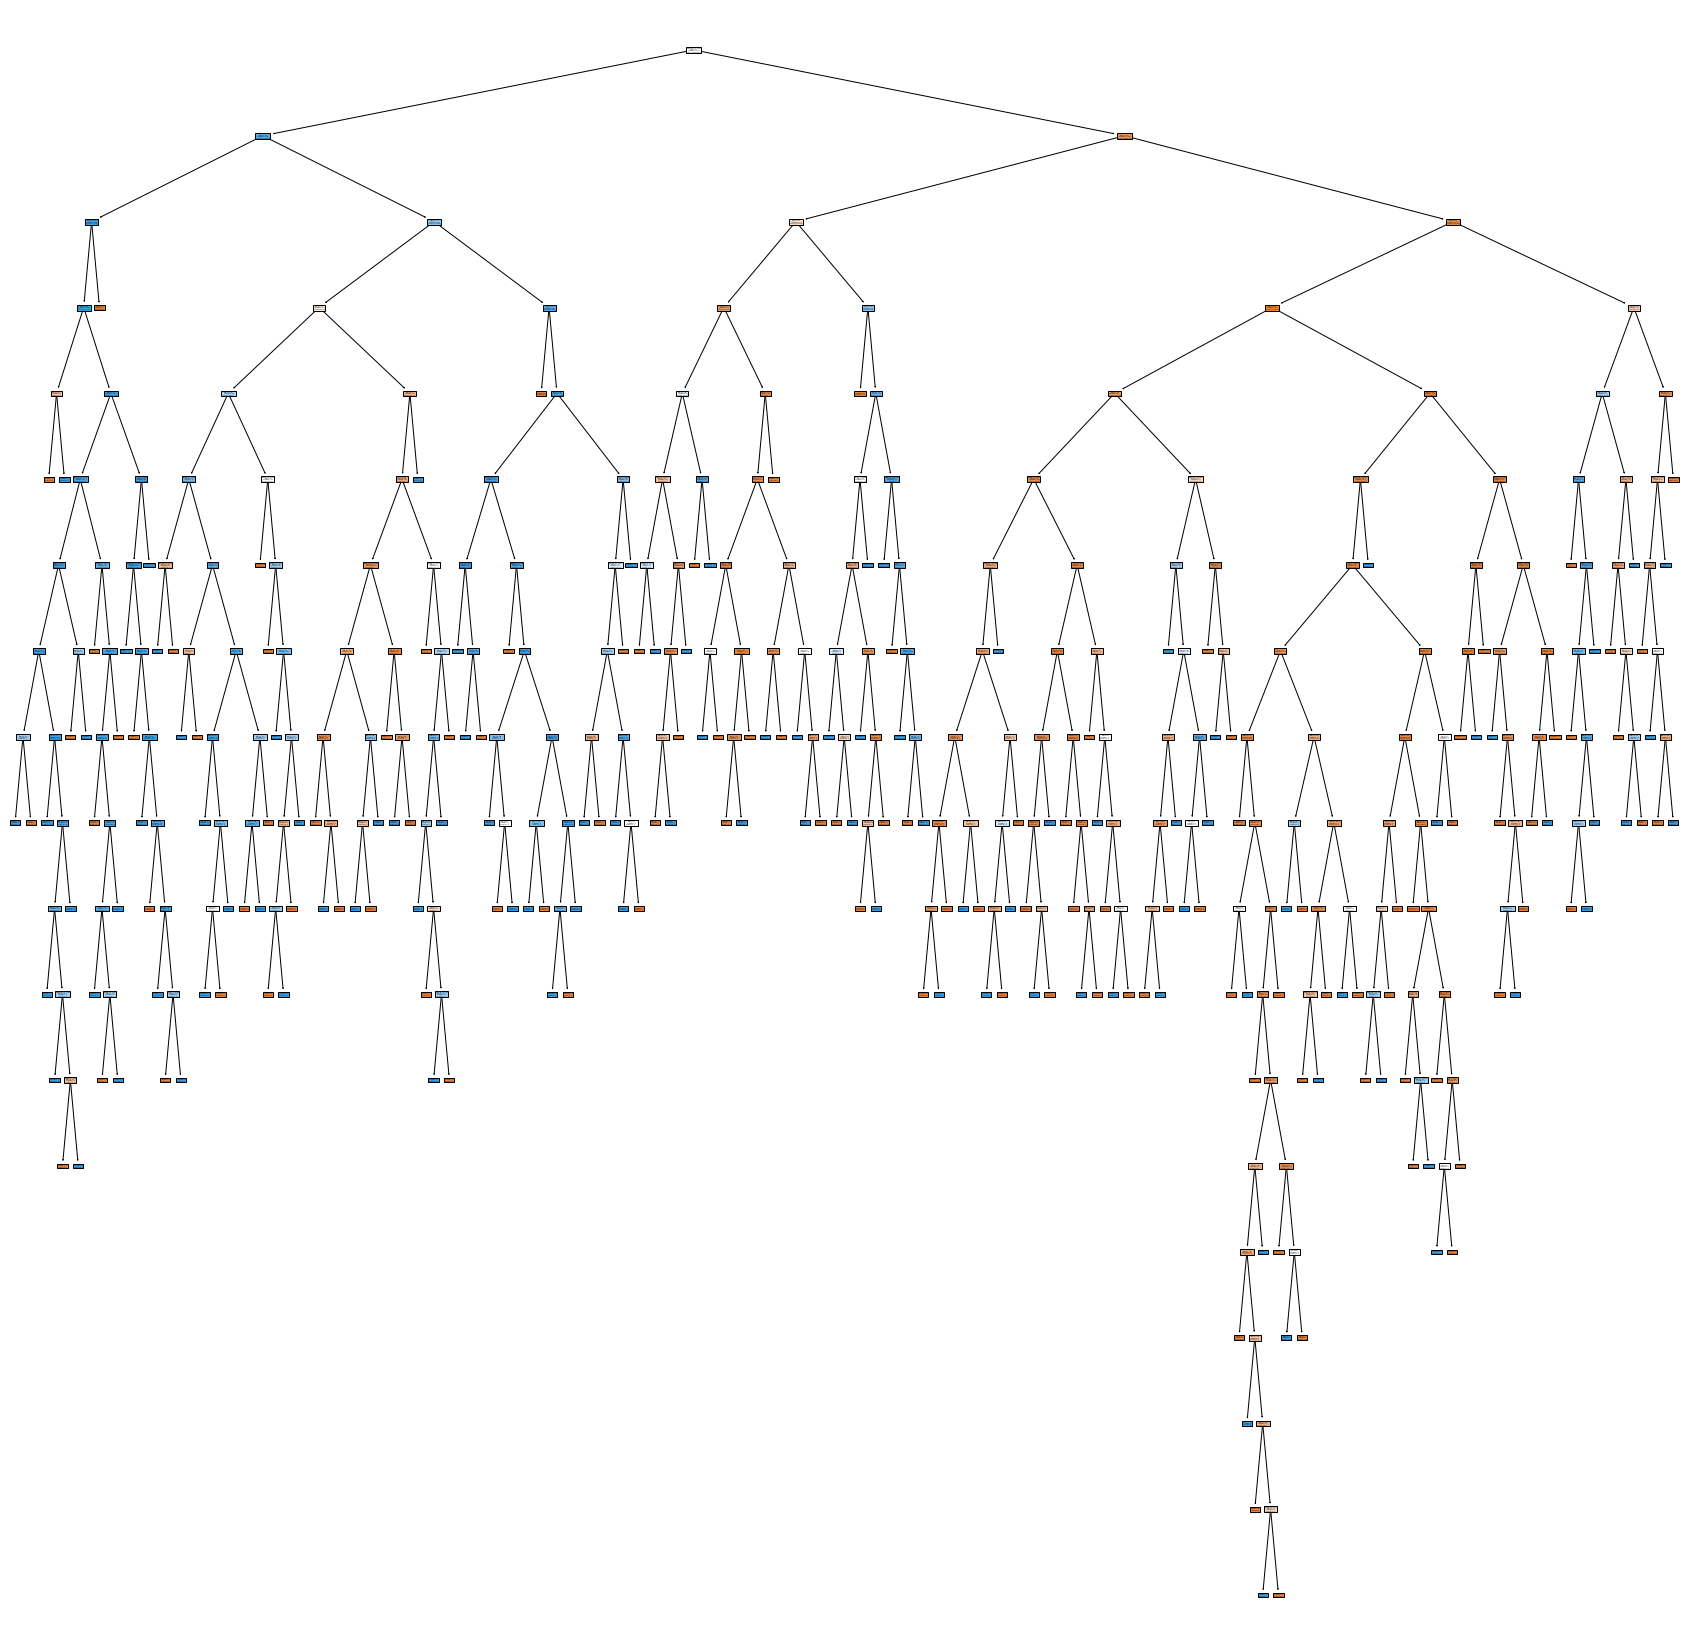

In [32]:
#create the tree 
from sklearn import tree
features=X.columns #input features
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt,feature_names=features,filled=True)

# pruning technique

In [33]:
#pruning technique
#max depth(reduce overfitting)
#pruning technique
#max_depth : - #Note : max_depth can not more than 8
#1. max_depth parameter 
##create object of DecisionTreeClassifier class and passing the parameter
#max_depth

In [34]:
#create objet of Decisiom TREE classifier class and passing the parameter
#maxdepth

dt1=DecisionTreeClassifier(random_state=1,max_depth=3)

In [35]:
#call the function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3501
           1       0.93      0.86      0.89      3499

    accuracy                           0.90      7000
   macro avg       0.90      0.90      0.90      7000
weighted avg       0.90      0.90      0.90      7000

[[3259  242]
 [ 478 3021]]


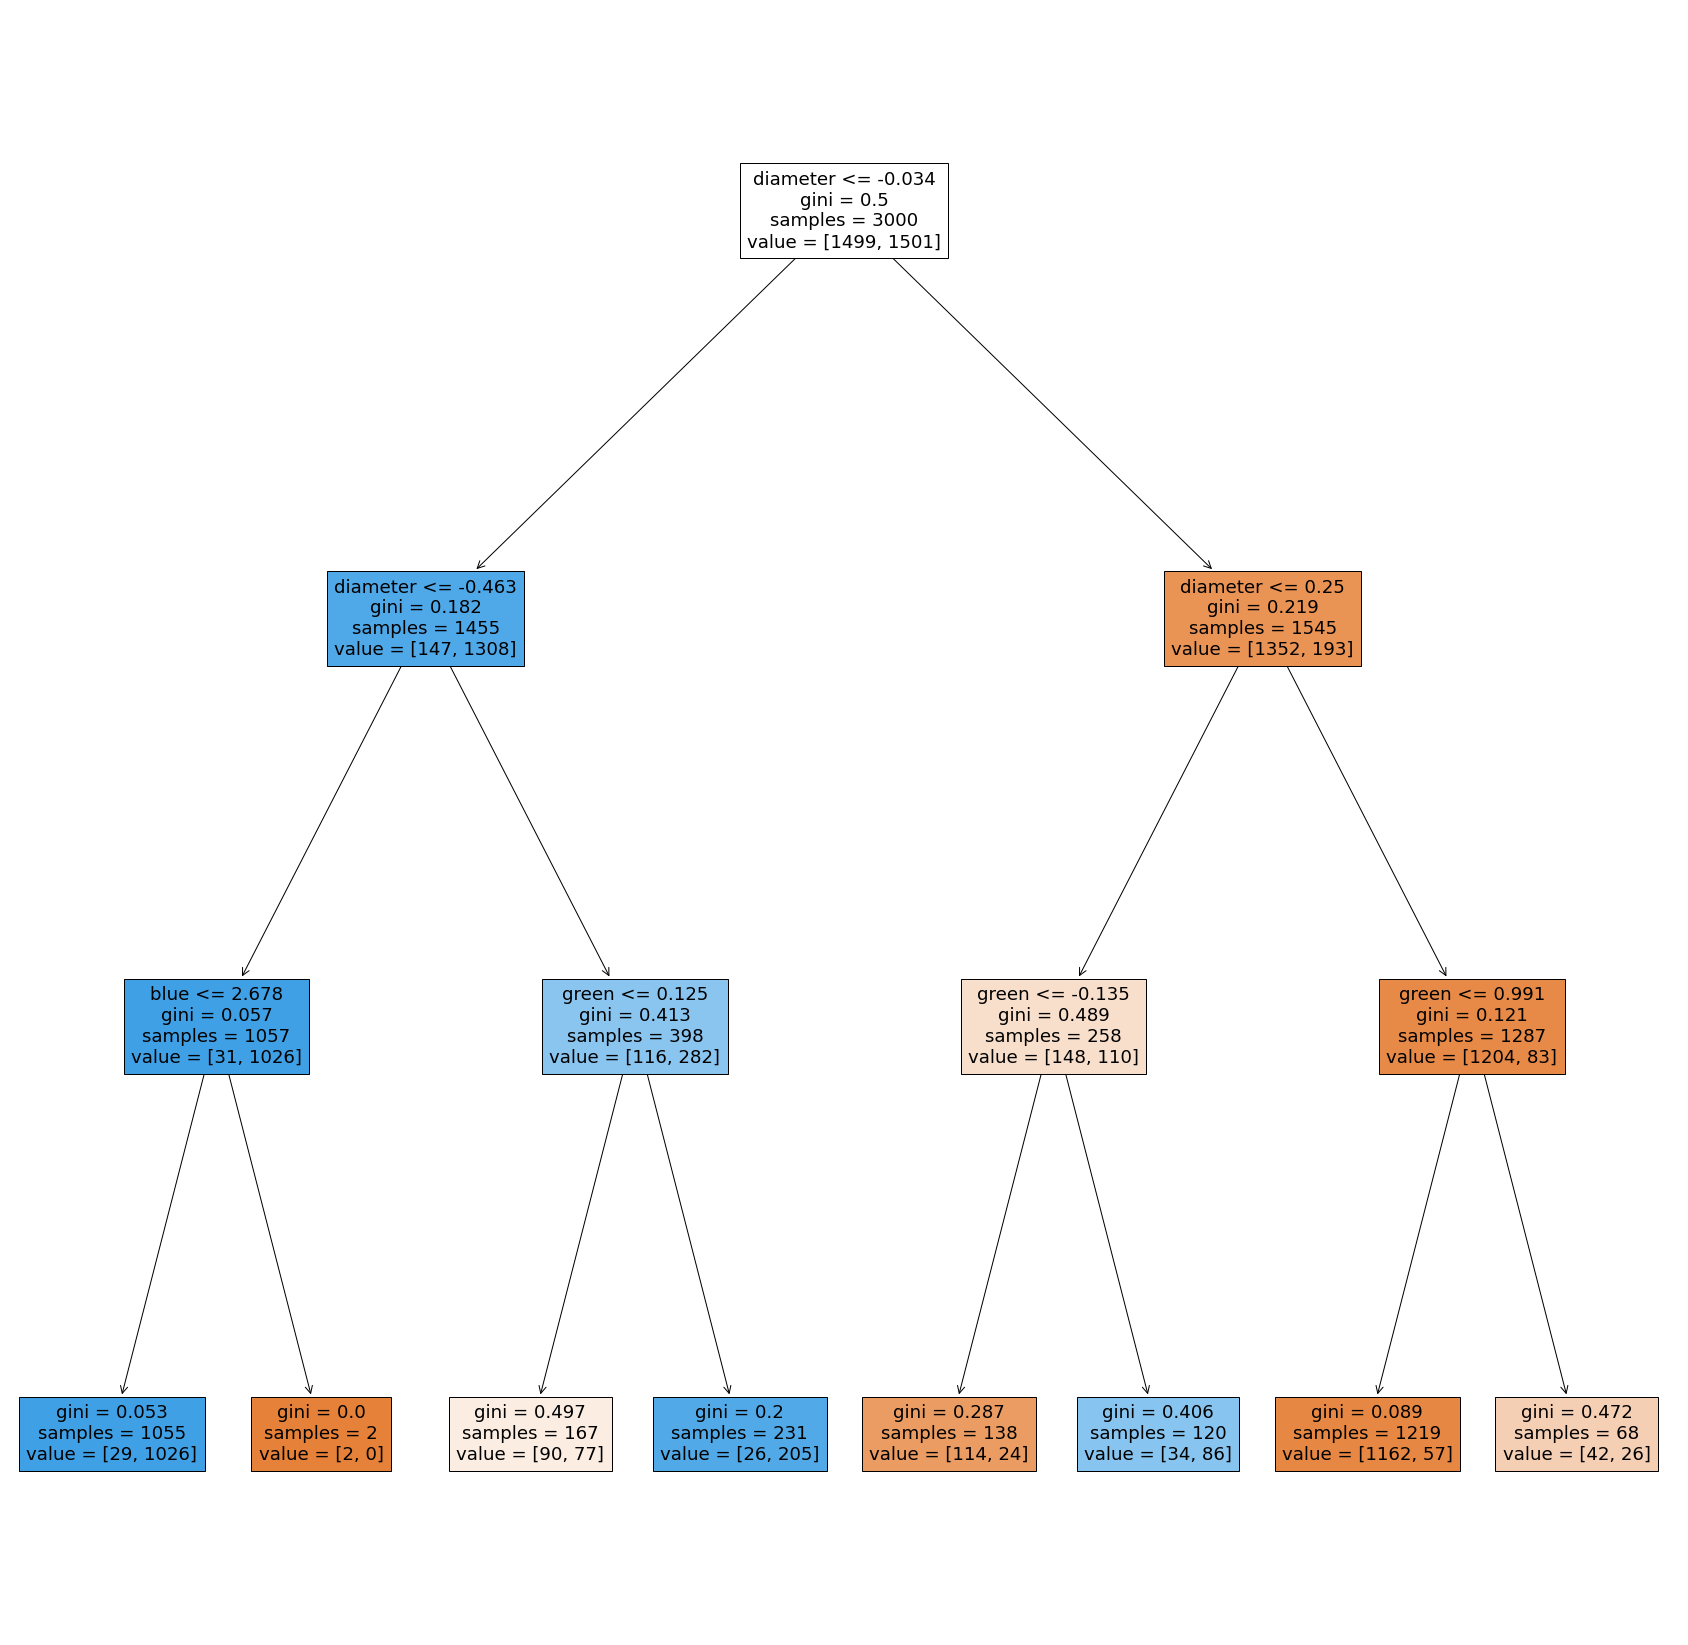

In [36]:
#create the tree 
from sklearn import tree
features=X.columns #input features
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [37]:
#create a dictrony IG information gain 
IG=dt1.feature_importances_
dict={'Input':X.columns,'IG':IG} 
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False) #decending order according to IG
df1.head()

,Input,IG
0,diameter,0.915837
1,weight,0.000000
2,red,0.000000
3,green,0.080684
4,blue,0.003479


In [38]:
#2nd purning technique : min_samples_leaf
#min_samples_leaf =45 or more means not less than=45 and max=100
##create object of DecisionTreeClassifier class
#leaf node means no child
for i in range(45,100,5):
  print('Min Sample Leaf:-',i)
  dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i) #by default gini
  #call function
  dt2=create_model(dt2)

Min Sample Leaf:- 45
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3501
           1       0.91      0.91      0.91      3499

    accuracy                           0.91      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.91      0.91      0.91      7000

[[3183  318]
 [ 320 3179]]
Min Sample Leaf:- 50
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3501
           1       0.91      0.91      0.91      3499

    accuracy                           0.91      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.91      0.91      0.91      7000

[[3183  318]
 [ 320 3179]]
Min Sample Leaf:- 55
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3501
           1       0.91      0.91      0.91      3499

    accuracy                           0.91      7000
   macro av

In [39]:
for i in range(45,100,5):
  print('Min Sample Leaf:-',i)
  dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy') 
  #change to entropy
  #call function
  dt2=create_model(dt2)

Min Sample Leaf:- 45
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3501
           1       0.91      0.91      0.91      3499

    accuracy                           0.91      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.91      0.91      0.91      7000

[[3179  322]
 [ 304 3195]]
Min Sample Leaf:- 50
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3501
           1       0.91      0.91      0.91      3499

    accuracy                           0.91      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.91      0.91      0.91      7000

[[3179  322]
 [ 304 3195]]
Min Sample Leaf:- 55
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3501
           1       0.91      0.91      0.91      3499

    accuracy                           0.91      7000
   macro av

In [40]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45) #by default gini
#call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3501
           1       0.91      0.91      0.91      3499

    accuracy                           0.91      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.91      0.91      0.91      7000

[[3183  318]
 [ 320 3179]]


In [41]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=70,criterion='entropy') 
#change to entropy
#call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3501
           1       0.89      0.94      0.91      3499

    accuracy                           0.91      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.91      0.91      0.91      7000

[[3116  385]
 [ 225 3274]]


# use Ensembling Technique  #RandomForestTree

In [42]:
#use Ensembling Technique 
#RandomForestTree
'''
Train the dataset on multiple decisiontreeclassifier 
algorithm 
'''
#Random Forest Tree 
#call Random Forest Tree from package

#ensemble means to train the same dataset from
#multiple algorithm

'\nTrain the dataset on multiple decisiontreeclassifier \nalgorithm \n'

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
X.shape

(10000, 5)

In [45]:
#create object of RandomForestClassifier tree
#decision tree is understood by RandomForestClassifier by default algo
for i in range(10,101):
  rfc=RandomForestClassifier(n_estimators=i,random_state=1)
  #here n_estimators means take how many no. of decisiontree 10 to 100
  #max_features means take how many input
  #bydefault gini
  #call function
  
  print('no n_estimators :-',i)
  rfc=create_model(rfc)
  #odd no. means hard voting
  #even means soft voting

no n_estimators :- 10
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3501
           1       0.95      0.93      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3328  173]
 [ 253 3246]]
no n_estimators :- 11
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3291  210]
 [ 218 3281]]
no n_estimators :- 12
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3501
           1       0.95      0.93      0.94      3499

    accuracy                           0.94      7000
   macro

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3296  205]
 [ 226 3273]]
no n_estimators :- 33
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3286  215]
 [ 217 3282]]
no n_estimators :- 34
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3300  201]
 [ 221 3278]]
no n_estimators :- 55
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3293  208]
 [ 217 3282]]
no n_estimators :- 56
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3295  206]
 [ 218 3281]]
no n_estimators :- 77
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3292  209]
 [ 213 3286]]
no n_estimators :- 78
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3292  209]
 [ 219 3280]]
no n_estimators :- 99
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3288  213]
 [ 217 3282]]
no n_estimators :- 100
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      

In [46]:
rfc=RandomForestClassifier(n_estimators=11,max_features=3,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3301  200]
 [ 219 3280]]


In [47]:
rfc=RandomForestClassifier(n_estimators=11,max_features=3,random_state=1,criterion='entropy')
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3283  218]
 [ 208 3291]]


# Boosting Tech = 1. Gradient Boost technuique

In [48]:
#Boosting Technique  : it is also Ensembling tech .
#1. gradient Boost technuique : second tech. of Boosting Ensembling technique 
# GB  : - its create a fully grown tree.this algorithm is focus on short comings 
#short comings means error

In [49]:
# Call GradientBoostingClassifier class from following package.
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
# Create an object of GradientBoosting class.
for i in range(1,100):
    # create an object of GradientBoostingClassifier class
    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
    # Call the function
    print('No of Decision Tree : ',i)
    gbc=create_model(gbc)

No of Decision Tree :  1
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3501
           1       0.93      0.86      0.89      3499

    accuracy                           0.90      7000
   macro avg       0.90      0.90      0.90      7000
weighted avg       0.90      0.90      0.90      7000

[[3259  242]
 [ 478 3021]]
No of Decision Tree :  2
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3501
           1       0.93      0.87      0.90      3499

    accuracy                           0.90      7000
   macro avg       0.90      0.90      0.90      7000
weighted avg       0.90      0.90      0.90      7000

[[3258  243]
 [ 460 3039]]
No of Decision Tree :  3
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3501
           1       0.91      0.91      0.91      3499

    accuracy                           0.91      7000

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3501
           1       0.93      0.93      0.93      3499

    accuracy                           0.93      7000
   macro avg       0.93      0.93      0.93      7000
weighted avg       0.93      0.93      0.93      7000

[[3250  251]
 [ 252 3247]]
No of Decision Tree :  25
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3501
           1       0.93      0.93      0.93      3499

    accuracy                           0.93      7000
   macro avg       0.93      0.93      0.93      7000
weighted avg       0.93      0.93      0.93      7000

[[3259  242]
 [ 257 3242]]
No of Decision Tree :  26
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3501
           1       0.93      0.93      0.93      3499

    accuracy                           0.93      7000
   macro avg       0.9

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3501
           1       0.93      0.93      0.93      3499

    accuracy                           0.93      7000
   macro avg       0.93      0.93      0.93      7000
weighted avg       0.93      0.93      0.93      7000

[[3271  230]
 [ 246 3253]]
No of Decision Tree :  47
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3501
           1       0.93      0.93      0.93      3499

    accuracy                           0.93      7000
   macro avg       0.93      0.93      0.93      7000
weighted avg       0.93      0.93      0.93      7000

[[3271  230]
 [ 245 3254]]
No of Decision Tree :  48
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3501
           1       0.93      0.93      0.93      3499

    accuracy                           0.93      7000
   macro avg       0.9

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3501
           1       0.94      0.93      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3284  217]
 [ 231 3268]]
No of Decision Tree :  69
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3501
           1       0.94      0.93      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3283  218]
 [ 234 3265]]
No of Decision Tree :  70
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3501
           1       0.94      0.93      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.9

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3293  208]
 [ 219 3280]]
No of Decision Tree :  91
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3295  206]
 [ 218 3281]]
No of Decision Tree :  92
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.9

In [51]:
# create an object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(random_state=1,n_estimators=74)
# Call the function
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3280  221]
 [ 227 3272]]


# 2. ADA Boosting : Adaptor Boosting

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
# Create an object of AdaBoostClassifier class.
ada=AdaBoostClassifier(random_state=1,n_estimators=3)
# call the function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3501
           1       0.89      0.87      0.88      3499

    accuracy                           0.89      7000
   macro avg       0.89      0.89      0.89      7000
weighted avg       0.89      0.89      0.89      7000

[[3142  359]
 [ 441 3058]]


In [54]:
# Create an object of AdaBoostClassifier class.
ada2=AdaBoostClassifier(random_state=1,n_estimators=8)
# call the function
ada2=create_model(ada2)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      3501
           1       0.93      0.89      0.91      3499

    accuracy                           0.91      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.91      0.91      0.91      7000

[[3279  222]
 [ 398 3101]]


In [55]:
# Create an object of AdaBoostClassifier class.
ada3=AdaBoostClassifier(random_state=1,n_estimators=74)
# call the function
ada3=create_model(ada3)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3501
           1       0.94      0.93      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3294  207]
 [ 236 3263]]


In [56]:
# Check Information gain of all inputs using inbuilt method 
# feature_importances_
ada.feature_importances_

array([0.33333333, 0.        , 0.        , 0.33333333, 0.33333333])

In [57]:
# Show information gain of all inputs.
IG=ada.feature_importances_
dict={'Input':X.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
0,diameter,0.333333
3,green,0.333333
4,blue,0.333333
1,weight,0.000000
2,red,0.000000


# 3. Extreme Gradient Boosting:- XGB Boosting

In [58]:
# Extreme Gradient Boosting:- XGB Boosting
#3. Extreame Gradient Boosting  : 3rd technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
#why call better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .

In [60]:
#!pip install xgboost

In [61]:
from xgboost import XGBClassifier

In [62]:
# Create an object of XGBClassifier
for i in range(1,101):
    xgc=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)
    # call function
    print('No. of estimators : ',i)
    xgc=create_model(xgc)
    
# automatic overfitting : reg means regularation and alpha or lambda :
# hyperparameter

# n_estimators<=100

No. of estimators :  1
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3501
           1       0.93      0.92      0.92      3499

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000

[[3248  253]
 [ 288 3211]]
No. of estimators :  2
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3501
           1       0.92      0.93      0.93      3499

    accuracy                           0.93      7000
   macro avg       0.93      0.93      0.92      7000
weighted avg       0.93      0.93      0.92      7000

[[3234  267]
 [ 258 3241]]
No. of estimators :  3
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3501
           1       0.92      0.93      0.93      3499

    accuracy                           0.93      7000
   ma

No. of estimators :  23
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3308  193]
 [ 211 3288]]
No. of estimators :  24
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3501
           1       0.94      0.94      0.94      3499

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

[[3304  197]
 [ 210 3289]]
No. of estimators :  25
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3501
           1       0.95      0.94      0.94      3499

    accuracy                           0.94      7000
  

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3501
           1       0.96      0.95      0.96      3499

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000

[[3375  126]
 [ 168 3331]]
No. of estimators :  46
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3501
           1       0.96      0.95      0.96      3499

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000

[[3375  126]
 [ 168 3331]]
No. of estimators :  47
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3501
           1       0.96      0.95      0.96      3499

    accuracy                           0.96      7000
   macro avg       0.96   

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3501
           1       0.97      0.95      0.96      3499

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000

[[3388  113]
 [ 170 3329]]
No. of estimators :  68
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3501
           1       0.97      0.95      0.96      3499

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000

[[3391  110]
 [ 170 3329]]
No. of estimators :  69
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3501
           1       0.97      0.95      0.96      3499

    accuracy                           0.96      7000
   macro avg       0.96   

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3501
           1       0.97      0.95      0.96      3499

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000

[[3395  106]
 [ 162 3337]]
No. of estimators :  90
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3501
           1       0.97      0.95      0.96      3499

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000

[[3396  105]
 [ 162 3337]]
No. of estimators :  91
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3501
           1       0.97      0.95      0.96      3499

    accuracy                           0.96      7000
   macro avg       0.96   

In [63]:
xgc=XGBClassifier(n_estimators=30,random_state=1,reg_alpha=1)
# call function
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3501
           1       0.96      0.95      0.95      3499

    accuracy                           0.95      7000
   macro avg       0.95      0.95      0.95      7000
weighted avg       0.95      0.95      0.95      7000

[[3346  155]
 [ 185 3314]]


# support vector

# Use SVM : support vector machine : this is a classification supervised learning
algo.
'''There are various kernel functions :

Linear Kernel function (use linear separated data)
polynomial kernel function (non-linearly)
radial basis kernel function (non-linearly)''

# 1. Linear Kernel (use linear separated data) function means data are easily 
#separatable with the help of straight line  ,
#this straight line is called decision boundary or hyperplane

In [64]:
#linear function
#call class
from sklearn.svm import LinearSVC
#Linear SVC means supoort vector classifier


In [65]:
# create object of SVC
svc=LinearSVC(random_state=1)#hard margin bydefault

In [66]:
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3501
           1       0.97      0.94      0.96      3499

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000

[[3416   85]
 [ 211 3288]]


In [67]:
#checking outlier bcz model can be overfit even accuracy is good if it has outlier.
#check whether model is overfit or not means add external error during training time
#that means apply soft margin 
#create the object  of inbuilt class Linearsvc adn passing parameter c
#for error
#svc1=LinearSVC(random_state=1,C=0.01)#soft margin
#here C inbuilt parameter which pass the value -0.5(0.001 to 1)


In [ ]:
# svc1=create_model(svc1)#here as we increase or decrese  the error there is no changes in acuracy 
#that means the model is not overfit
#if  the changes come in accuracy then we have to go with non linear

In [69]:
#if add external error during training time , no changes in score(recall)
#means data is non-linear
#can be possible , dataset is not linear means dataset is non-linear  .
#use Non-linear kernal function of SVM means 2 classes are not separatable 
#with straight line 
#There are 3 types of Kernal function of SVM
#1. Linear SVC  : use for linear data
#2. polynomial kernal function : increase the low dimension to high dimension
#3. radial basis kernal function


# here use 2. polynomial kernal function : 
#increase the low dimension to 
#high dimension

In [70]:
#2. polynomial kernal function
#from sklearn.svm import SVC
#svc inbuilt class for non linear data (poly adn radial basis)

In [71]:
#create object of svc clas (for polynomial)
#poly_svc=SVC(random_state=1,kernel='poly')


In [72]:
#call the function
#poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3501
           1       0.93      0.93      0.93      3499

    accuracy                           0.93      7000
   macro avg       0.93      0.93      0.93      7000
weighted avg       0.93      0.93      0.93      7000

[[3255  246]
 [ 253 3246]]


In [73]:
#here we use non-linear : radial basis kernal function
#create object of svc class (for radial-basis)
#r_svc=SVC(random_state=1,kernel='rbf')#rbf means radial basis function

In [74]:
#call the function
#r_svc=create_model(r_svc)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3501
           1       0.93      0.93      0.93      3499

    accuracy                           0.93      7000
   macro avg       0.93      0.93      0.93      7000
weighted avg       0.93      0.93      0.93      7000

[[3259  242]
 [ 237 3262]]


# Naive bayes

In [75]:
from sklearn.naive_bayes import GaussianNB


In [76]:
#create thr functiom
gnb=GaussianNB()

In [77]:
#call the function
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3501
           1       0.92      0.92      0.92      3499

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000

[[3236  265]
 [ 275 3224]]


In [78]:
#perfroming Multinominal  Naivebayes theorem
#training thr data set
from sklearn.naive_bayes import MultinomialNB
#inbuilt class Gaussian


In [79]:
#multinomial nb naive bayes always use object type input columns
#means it is used for nlp means natural lang process
#create object of multinomila class
mnb=MultinomialNB()
#error bcz it has negetive value  we have to use min max scaler


In [81]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [82]:
#minmaxscaler
from sklearn.preprocessing import MinMaxScaler
#Create the object of StandardScaler class
ss=MinMaxScaler()
X_train=ss.fit_transform(X_train)#on training data
X_test=ss.transform(X_test) #on testing data

In [83]:
#MultinomialNB naive bayes always used object type input columns
#means it is used for NLP means natural lang. processing 
#create object of MultinomialNB class
mnb=MultinomialNB()

In [84]:
#call the function
mnb=create_model(mnb)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1499
           1       0.88      0.87      0.88      1501

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000

[[1317  182]
 [ 192 1309]]


# K-nn algorithm

In [85]:
#k nearest neighbour algo rithm
#it is classification algorithm
#it works on nearest data point between 0 and 1
#disadvantage can't work on large data set ,consume more time and computation power
#k means minimum number of distance
#knn work on unstructed data 
#its not important algo
#knn works on small data
#use for image detection


In [86]:
#use Knn alogirthm
from sklearn.neighbors import KNeighborsClassifier

In [87]:
#create the object of Neighborsclassifier
#Create the object of KNeighborsClassifier  
knc= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 
#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)
#best value of k=5

In [88]:

knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1499
           1       0.92      0.92      0.92      1501

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000

[[1372  127]
 [ 126 1375]]
